In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix
%matplotlib inline

In [2]:
iris = pd.read_csv('Iris.csv')
X = iris[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
yTarget = iris[['Species']]

irisSpecies = iris['Species'].unique()
species_dict = {}
for idx, iris_specie in enumerate(irisSpecies):
    species_dict[iris_specie] = idx

In [3]:
for iris_specie in irisSpecies:
    yTarget[yTarget['Species'] == iris_specie] = species_dict[iris_specie]

C:\Users\J.S\AppData\Local\Temp\ipykernel_3536\2589008822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yTarget[yTarget['Species'] == iris_specie] = species_dict[iris_specie]
C:\Users\J.S\AppData\Local\Temp\ipykernel_3536\2589008822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yTarget[yTarget['Species'] == iris_specie] = species_dict[iris_specie]


In [4]:
yTargetSpecies = yTarget['Species'].values
yTargetFormat = np.array(list(yTargetSpecies), dtype=np.int64)

In [5]:
def k_means(X, K):
    centroids_history = []
    labels_history = []
    rand_index = np.random.choice(X.shape[0], K)  
    centroids = X[rand_index]
    centroids_history.append(centroids)
    
    while True:

        labels = np.argmin(cdist(X, centroids), axis=1)
        labels_history.append(labels)
        new_centroids = np.array([X[labels == i].mean(axis=0)
                                for i in range(K)])
        centroids_history.append(new_centroids)
        
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels, centroids_history, labels_history

In [6]:
X_mat = X.values
K_clusters = 3
centroids, labels, centroids_history, labels_history = k_means(X_mat, K_clusters)

In [7]:
def get_confusion_matrix(y_target_in, labels_in):
    conf_mat = confusion_matrix(y_target_in, labels_in)
    conf_mat_df = pd.DataFrame(conf_mat, index=irisSpecies, columns=irisSpecies)
    
    plt.figure(figsize=(5.5,4))
    plt.title('Confusion Matrix for Iris Data')
    plt.imshow(conf_mat_df, cmap='hot', interpolation='nearest')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    return conf_mat_df

In [8]:
calculated_accuracy_score = accuracy_score(yTargetFormat, labels)
print(calculated_accuracy_score)

0.02


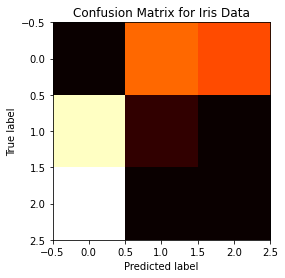

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,0,26,24
Iris-versicolor,47,3,0
Iris-virginica,50,0,0


In [9]:
conf_mat_df = get_confusion_matrix(yTargetFormat, labels)
conf_mat_df

### Running the algo 55 times

In [10]:
yTargetFormat = np.array(list(yTargetSpecies), dtype=np.int64)

accuracy_dict = {}
accuracy_score_list = []

for i in range(55):
    print(f'Iteration acount: {i}')
    centroids, labels, centroids_history, labels_history = k_means(X_mat, K_clusters)

    calculated_accuracy_score = accuracy_score(yTargetFormat, labels)
    dict_data = {
        'accuracy_score_calculated': calculated_accuracy_score,
        'centroids': centroids
    }
    accuracy_dict[i] = dict_data
    accuracy_score_list.append(calculated_accuracy_score)

Iteration acount: 0
Iteration acount: 1
Iteration acount: 2
Iteration acount: 3
Iteration acount: 4
Iteration acount: 5
Iteration acount: 6
Iteration acount: 7
Iteration acount: 8
Iteration acount: 9
Iteration acount: 10
Iteration acount: 11
Iteration acount: 12
Iteration acount: 13
Iteration acount: 14
Iteration acount: 15
Iteration acount: 16
Iteration acount: 17
Iteration acount: 18
Iteration acount: 19
Iteration acount: 20
Iteration acount: 21
Iteration acount: 22
Iteration acount: 23
Iteration acount: 24
Iteration acount: 25
Iteration acount: 26
Iteration acount: 27
Iteration acount: 28
Iteration acount: 29
Iteration acount: 30
Iteration acount: 31
Iteration acount: 32
Iteration acount: 33
Iteration acount: 34
Iteration acount: 35
Iteration acount: 36
Iteration acount: 37
Iteration acount: 38
Iteration acount: 39
Iteration acount: 40
Iteration acount: 41
Iteration acount: 42
Iteration acount: 43
Iteration acount: 44
Iteration acount: 45
Iteration acount: 46
Iteration acount: 47
It

In [11]:
max_accuracy_score = max([val['accuracy_score_calculated'] for key,val in accuracy_dict.items()])
max_accuracy_score

0.8933333333333333

In [12]:
k = [k for k,v in accuracy_dict.items() if v['accuracy_score_calculated'] == max_accuracy_score]
best_centroid = accuracy_dict[k[0]]['centroids']
best_centroid

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

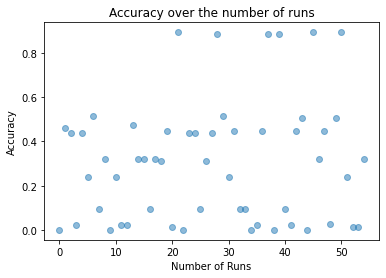

In [13]:
x_data = range(0, len(accuracy_score_list))
plt.scatter(x_data, accuracy_score_list, alpha=0.5)
plt.title('Accuracy over the number of runs')
plt.xlabel('Number of Runs')
plt.ylabel('Accuracy')
plt.show()

## Q2

In [14]:
# defines the reward matrix
r = np.array([[-1, -1, -1, -1, 0, -1],
              [-1, -1, -1, 0, -1, 100],
              [-1, -1, -1, 0, -1, -1],
              [-1, 0, 0, -1, 0, -1],
              [0, -1, -1, 0, -1, 100],
              [-1, 0, -1, -1, 0, 100]]).astype("float64")
q = np.zeros_like(r)


def update_q(state, next_state, action, alpha, gamma):
    r_sa = r[state, action]
    q_sa = q[state, action]
    new_q = q_sa + alpha * (r_sa + gamma * max(q[next_state, :]) - q_sa)
    q[state, action] = new_q
    # rescale to between 0 and 1
    rn = q[state][q[state] > 0] / np.sum(q[state][q[state] > 0])
    q[state][q[state] > 0] = rn
    return r[state, action]


def show_path():
    # show all the paths
    for i in range(len(q)):
        current_state = i
        path = "%i -> " % current_state
        n_steps = 0
        while current_state != 5 and n_steps < 20:
            next_state = np.argmax(q[current_state])
            current_state = next_state
            path += "%i -> " % current_state
            n_steps = n_steps + 1
        # cut off final arrow
        path = path[:-4]
        print("Optimal Path for starting state %i" % i)
        print(path)
        print("")


# hyperparameters
gamma = 0.4  # vary this between 0 and 1 i.e., (0,1)
alpha = 0.3  # vary this between 0 and 1 inclusive, i.e., [0,1]
n_episodes = 300  # try different values, e.g., 10, 500, 10000 and so forth
epsilon = 0.05  # you can experiment with this as well

n_states = 6
n_actions = 6

random_state = np.random.RandomState(10)  # you may try without seed value and other seed values

for e in range(int(n_episodes)):
    states = list(range(n_states))
    random_state.shuffle(states)
    current_state = states[0]
    goal = False
    if e % int(n_episodes / 10.) == 0 and e > 0:
        pass
    while not goal:
        # epsilon greedy
        valid_moves = r[current_state] >= 0
        if random_state.rand() < epsilon:
            actions = np.array(list(range(n_actions)))
            actions = actions[valid_moves == True]
            if type(actions) is int:
                actions = [actions]
            random_state.shuffle(actions)
            action = actions[0]
            next_state = action
        else:
            if np.sum(q[current_state]) > 0:
                action = np.argmax(q[current_state])
            else:
                # Don't allow invalid moves at the start
                # Just take a random move
                actions = np.array(list(range(n_actions)))
                actions = actions[valid_moves == True]
                random_state.shuffle(actions)
                action = actions[0]
            next_state = action
        reward = update_q(current_state, next_state, action,
                          alpha=alpha, gamma=gamma)
        # Goal due to  rescaling
        if reward > 1:
            goal = True
        current_state = next_state
print("Q Table")
print(q)
show_path()


Q Table
[[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  1.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 9.28013007e-127
  0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 1.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 4.89271359e-001 0.00000000e+000 0.00000000e+000
  5.10728641e-001 0.00000000e+000]
 [6.43694045e-039 0.00000000e+000 0.00000000e+000 2.27517553e-125
  0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 1.00000000e+000]]
Optimal Path for starting state 0
0 -> 4 -> 5

Optimal Path for starting state 1
1 -> 5

Optimal Path for starting state 2
2 -> 3 -> 4 -> 5

Optimal Path for starting state 3
3 -> 4 -> 5

Optimal Path for starting state 4
4 -> 5

Optimal Path for starting state 5
5

